<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/05_03_fitgoodness_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 05_03_fitgoodness

Standard imports

In [1]:
import math
import os

In [2]:
os.chdir('sample_data')

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [7]:
gapminder = pd.read_csv('gapminder.csv')

In [8]:
gdata = gapminder.query('year == 1985')

In [9]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

Setting up model plot

In [15]:
def plotfit(fit):
    plotdata()
    plt.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Three models from last video

In [11]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [12]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

In [13]:
surviving_byregion_population = smf.ols(
    formula='babies_per_woman ~ -1 + region + age5_surviving'
            '+ age5_surviving:region - age5_surviving + population',
    data=gdata).fit()

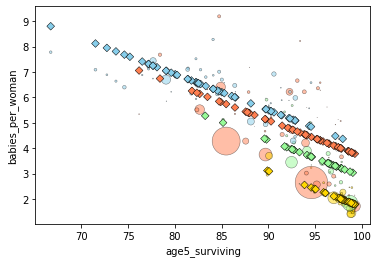

In [16]:
'''
Surviving includes constant terms for every region plus a single main term, a
slope, for age five survival.
'''
plotfit(surviving)

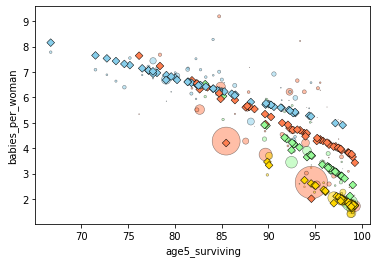

In [17]:
'''
This one includes the constant terms, a different slope for every region, and a 
main term for the population.
'''
plotfit(surviving_byregion_population)

In [ ]:
'''
The question is how can we tell which model is better? 

In this unit, we will be looking at classical measure of goodness of fit, such 
as mean square residual, R**2, the F Statistics, and ANOVA tables. All of these,
and many more, have been developed in the analytics-heavy pre-computer era, so
they do require some mathematical development to be understood fully.
'''

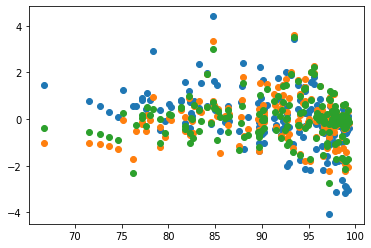

In [18]:
'''
The first thing we can do is plot the actual residuals. This is saved in the 
StatsModels fit results object. We're going to do a scatter plot of an explanatory 
variable against the residuals.

We can see that our best model so far does better than the simple ones, but not
by much.

Is this because it would be better for our residuals to be closer to a straight 
line?

'''
plt.scatter(gdata.age5_surviving,groupmeans.resid)
plt.scatter(gdata.age5_surviving,surviving.resid)
plt.scatter(gdata.age5_surviving,surviving_byregion_population.resid)

In [19]:
'''
The fit results object also contain the mean square residual, which gives us
goodness of fit in a single number.

Below, we're going to loop through the three different models, and just print
mse_resid for mean squared error.

He says that Mean Squared Error is the first thing and simplest thing he looks at.
'''
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.mse_resid)

1.4979520263709156
0.9423025333008324
0.8480227300570337


In [ ]:
'''
The R Squared is another statistic that gives us an idea of goodness of fit. It
is R**2 = (Explained Variance)/(Total Variance). Explained Variance is the variance
of the fitted model divided by the total variance of the data. It has a min,max
of 0,1.
'''
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.rsquared)

0.6364676965596588
0.7726009080146058
0.7999775707885213


In [ ]:
'''
In both cases for mean squared error and r squared, we see progress in going towards
more complicated models.
'''

In [20]:
'''
Another interesting number that is computed for us by StatsModels is the F-Statistic,
which takes into account not only the explained and unexplained variance, but the
number of model parameters. This shows that too many parameters will overfit the
data, conforming to the vagaries of the observations, but losing predictive power.

F statistic: explanatory power of fit parameters compared to "random" fit vectors.

As John von Neumann famously said, "With four parameters, I can fit an elephant, 
and with five, I can make him wiggle his trunk."

In essence, the F-Statistic measures how much, on average, each parameter contributes
to the growth of the R Squared, compared to a random model vector. That is, the
hypothetical explanatory variable that has random values, and no link to the response
variable at all.

An F of 1 means that the parameter contributes the same as a random vector. A large
F, that the parameters explains much more than that.

We get the F-Statistic from the result objects.

The below values tell us that the simple surviving model (the second one) seems
to hit a sweet spot.

'''
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.fvalue)

103.88003937611684
150.34180603430977
86.48787556725169


In [21]:
'''
StatsModels actually provides a lot more. Look at the below summary for a fit.
Um, really cool but it looks like gibberish to me. I hope that changes.
'''
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           8.26e-56
Time:                        18:43:58   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
'''
Certain key goodness of fit statistics are collected in what is known as an ANOVA
table, where ANOVA stands for analysis of variance
'''

In [23]:
'''
The first column, df, shows the number of degrees of freedom, the number of parameters,
and for the residual, the number of data points - minus the number of parameters.

The sum squared and mean squared columns show the total and average explained and 
residual variance.

The column F is the F-statistic.

The last column is the P value for a known model with the same number of parameters
as ours but where all the terms are random.

He says that clearlythe groupmeans region explains a lot of the variance of the 
data, with a very high F-Statistic

'''

sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


In [24]:
'''
Adding the age 5 surviving variable explains a high reduction of the variance, but
the F Statistic is still pretty high.
'''

sm.stats.anova_lm(surviving)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [25]:
'''
For our most complicated model, we get even lower value for the F Statistic for
the different parameters, because they are sharing in the interpretation of the
data.
'''
sm.stats.anova_lm(surviving_byregion_population)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN


In [ ]:
'''
In the next video, we see a much simpler technique for machine learning to compare
different models.
'''